In [1]:
from matplotlib import pyplot as plt
import torch
from pixel import PIXELConfig, PIXELForPreTraining
config = PIXELConfig.from_pretrained("Team-PIXEL/pixel-base")
model = PIXELForPreTraining.from_pretrained("Team-PIXEL/pixel-base", config=config)

In [2]:
def plot_weights(weights, outname="weights.png", show=True, save=False, dim=0, average=False):
    ''' Copied from https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/8 
        If average == True, dim is ignored.
    '''
    
    if average == True:
        def aggregator(x):
            return torch.mean(x, dim=0)
    else:
        def aggregator(x):
            return x[dim]
                
    num_cols = 32  # control the size of the image visualization
    num_kernels = weights.shape[0]
    num_rows = 1 + num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    for i in range(weights.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)  # create the subplot
        ax1.imshow(aggregator(weights[i]))  # add the image to the subplot
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    if save:
        plt.savefig(outname, bbox_inches='tight')
    if show:
        plt.show()
    plt.close()

## Visualize weights after 100K pretraining steps

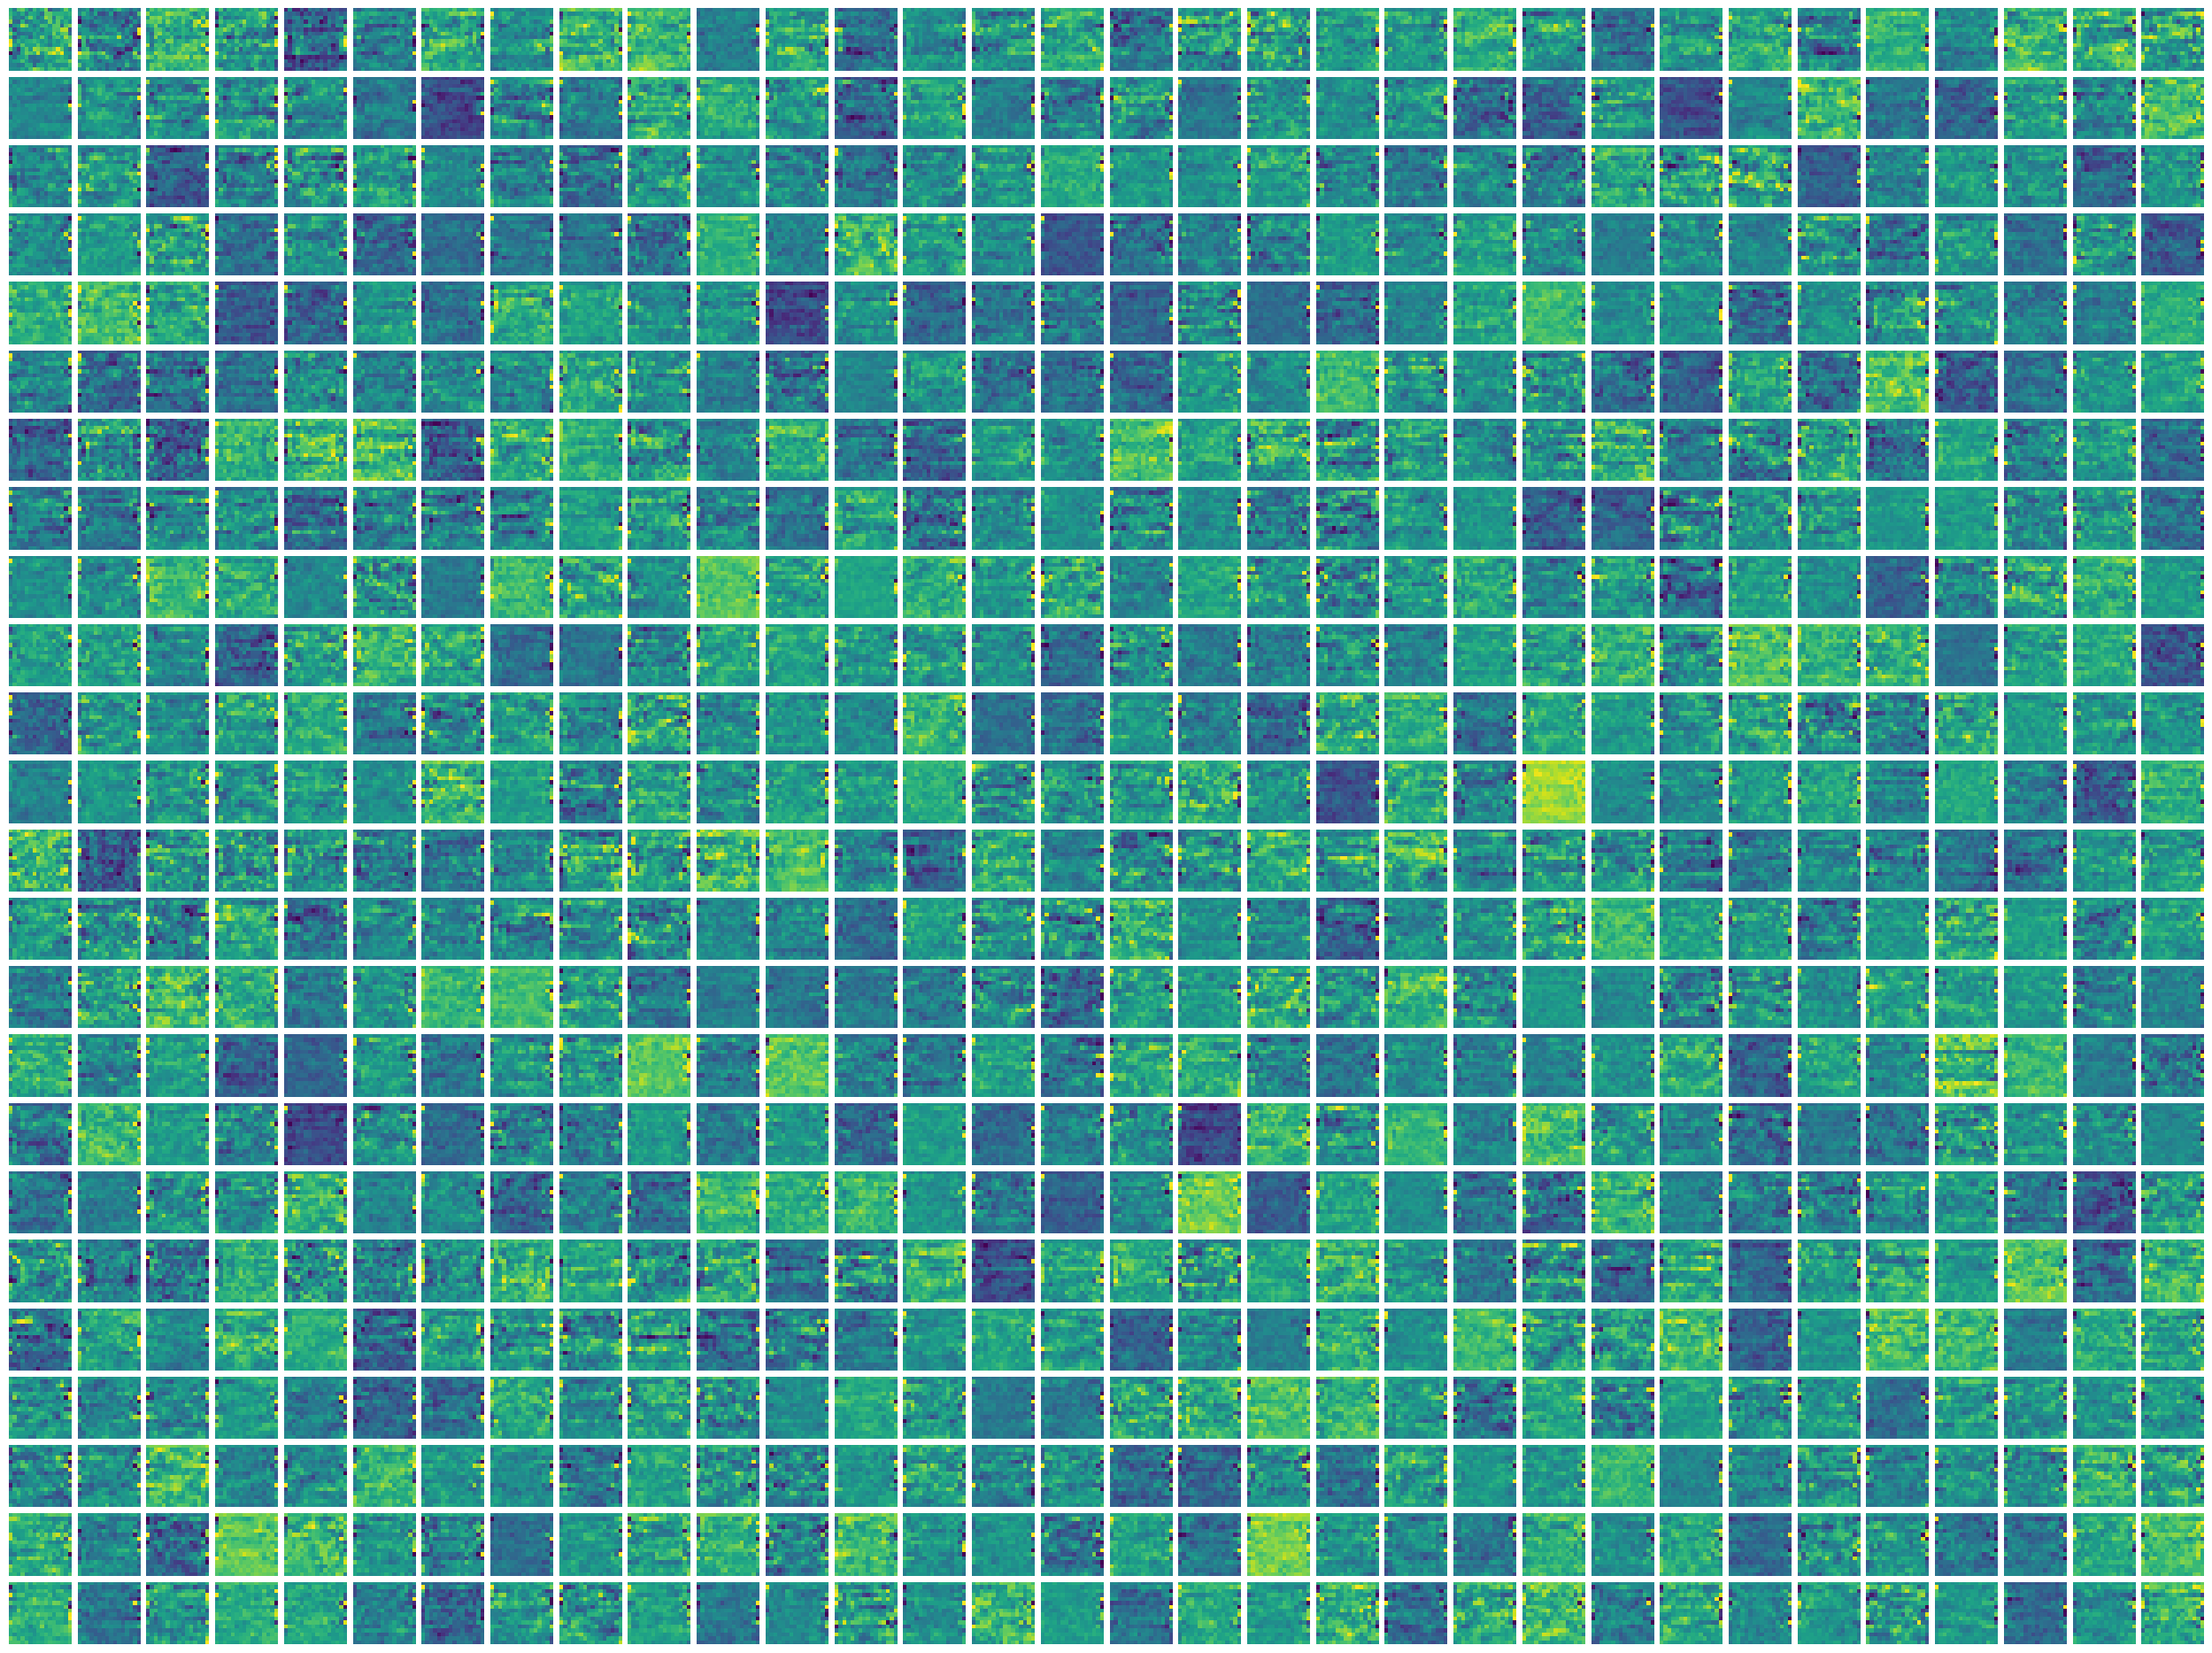

In [3]:
model100k = PIXELForPreTraining.from_pretrained("Team-PIXEL/pixel-base", revision="b72b22a", config=config)
tensor100k = model100k.vit.embeddings.patch_embeddings.projection.weight.data  # grab the Conv2D projection weights
plot_weights(tensor100k, average=True)

## Visualize weights after 500K pretraining steps

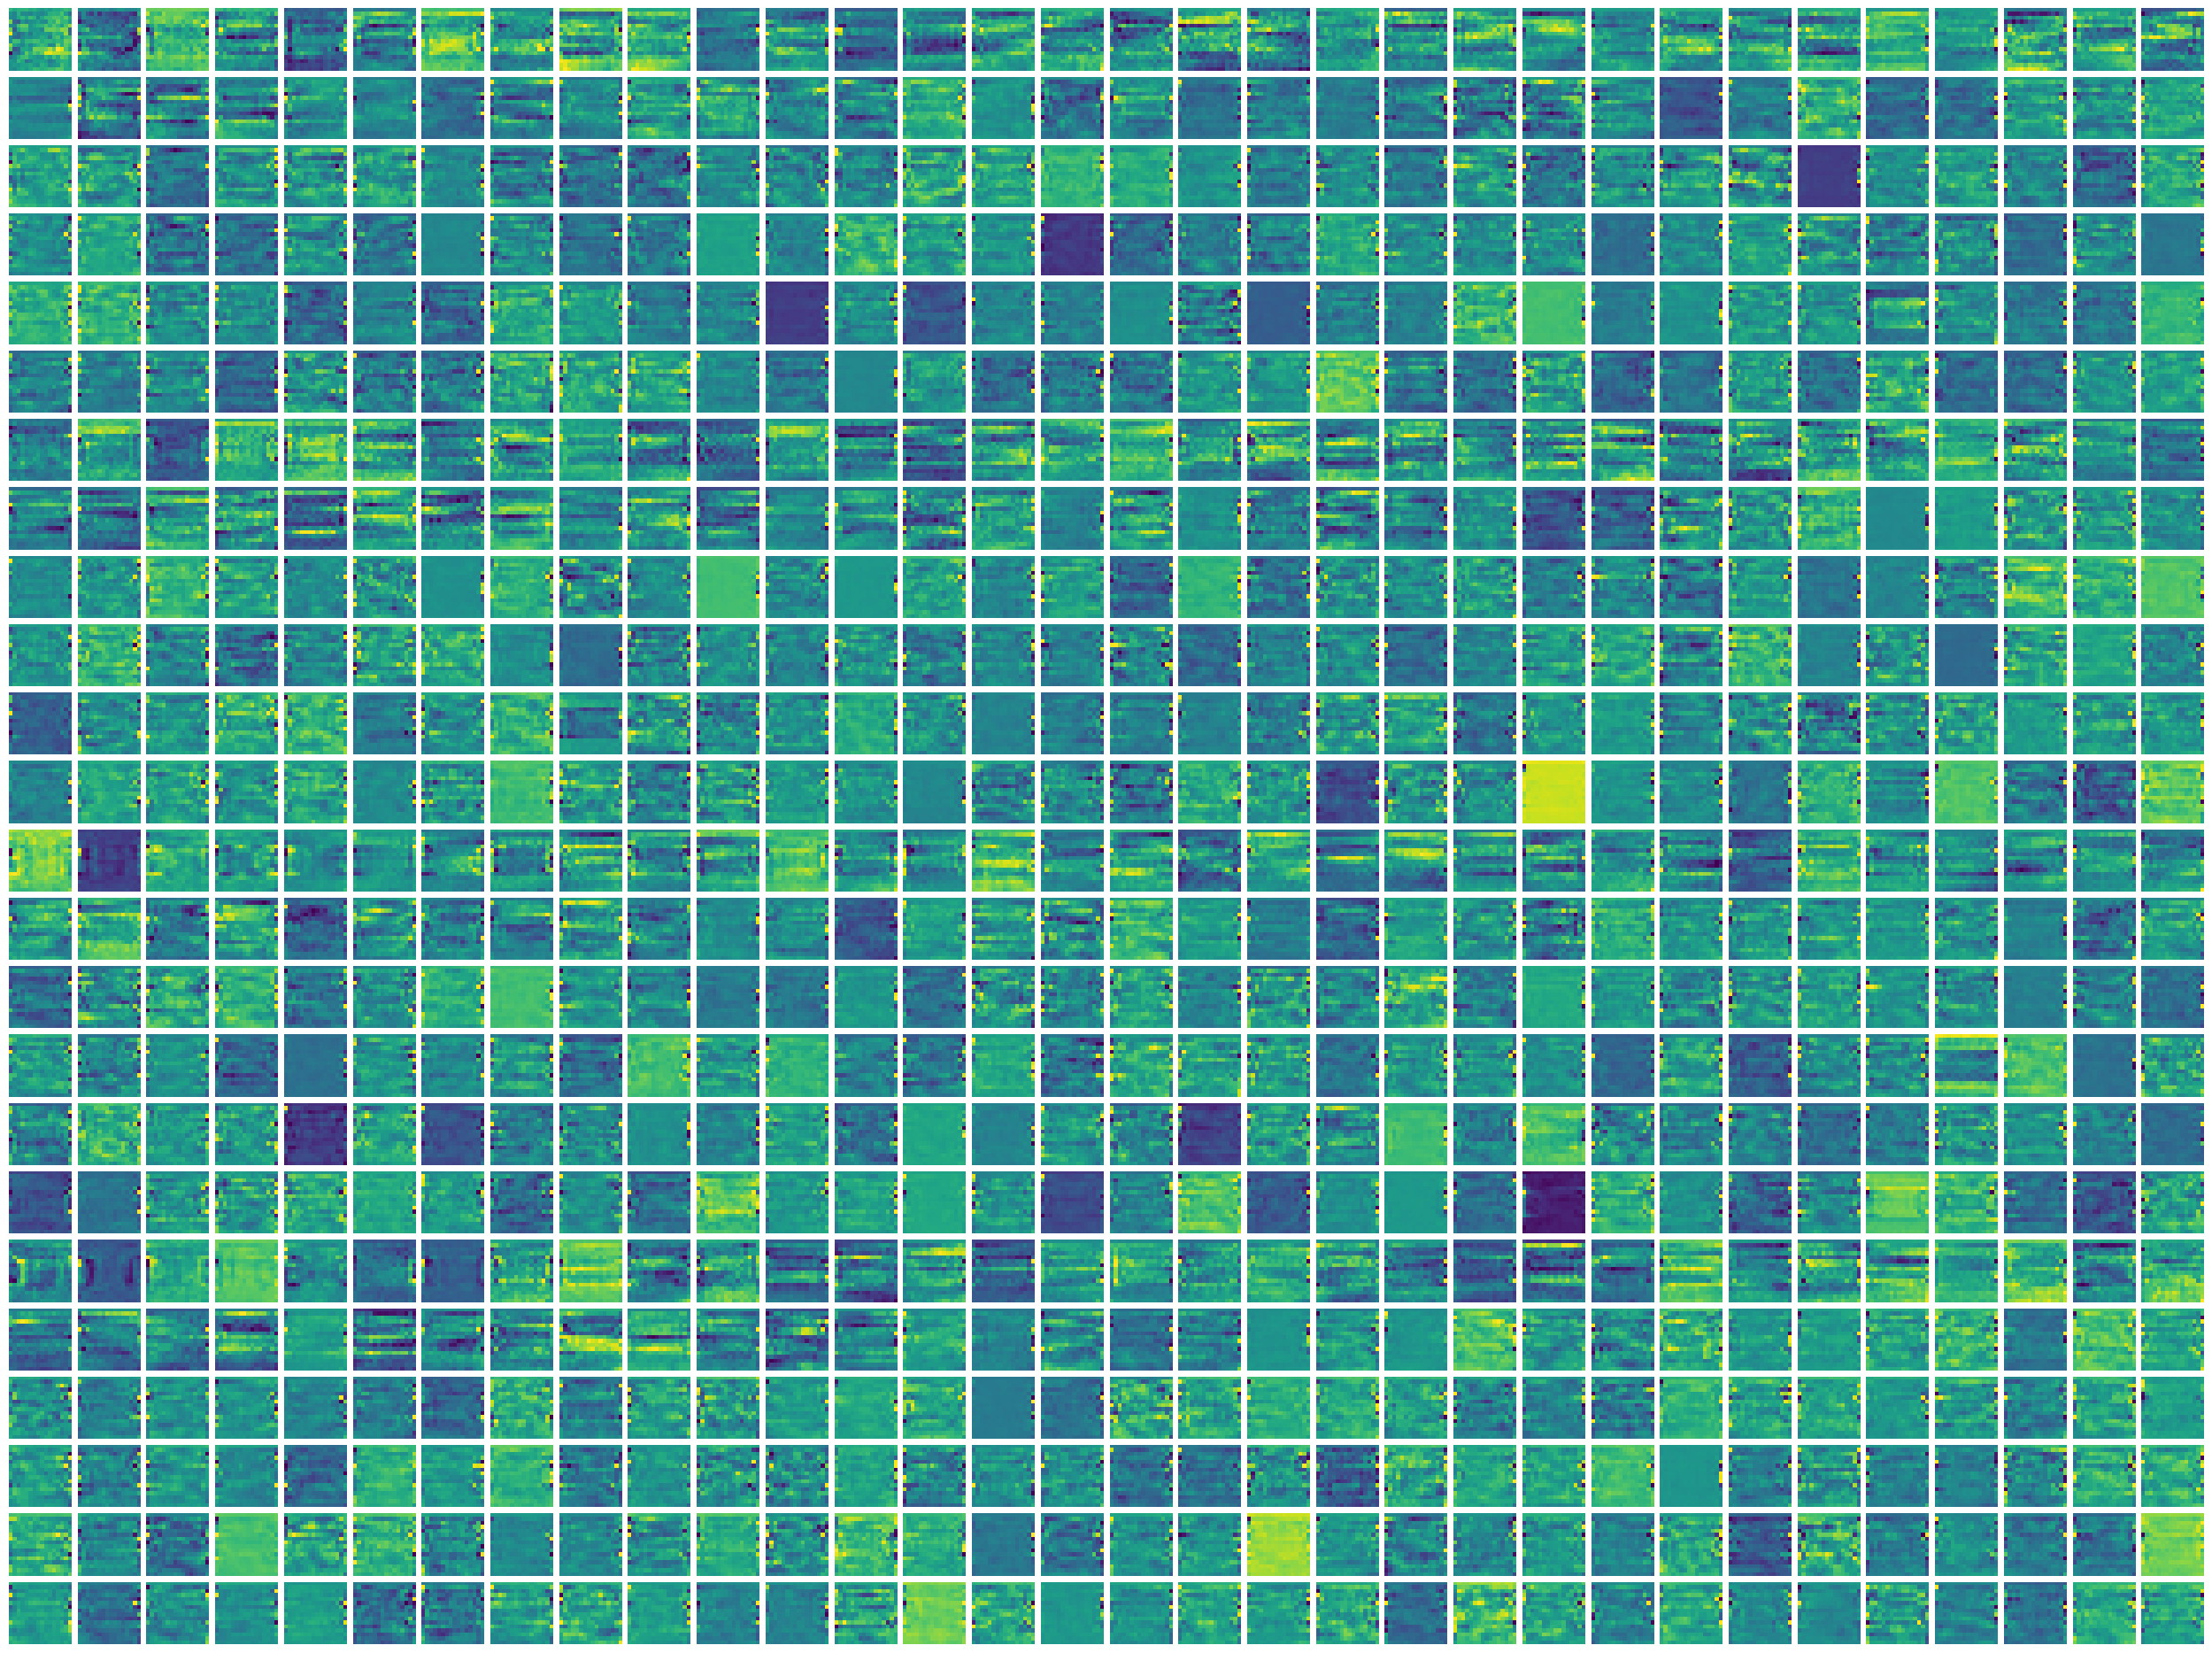

In [4]:
model500k = PIXELForPreTraining.from_pretrained("Team-PIXEL/pixel-base", revision="4a1e3f9", config=config)
tensor500k = model500k.vit.embeddings.patch_embeddings.projection.weight.data  # grab the Conv2D projection weights
plot_weights(tensor500k, average=True)

## Visualize weights after 1M pretraining steps

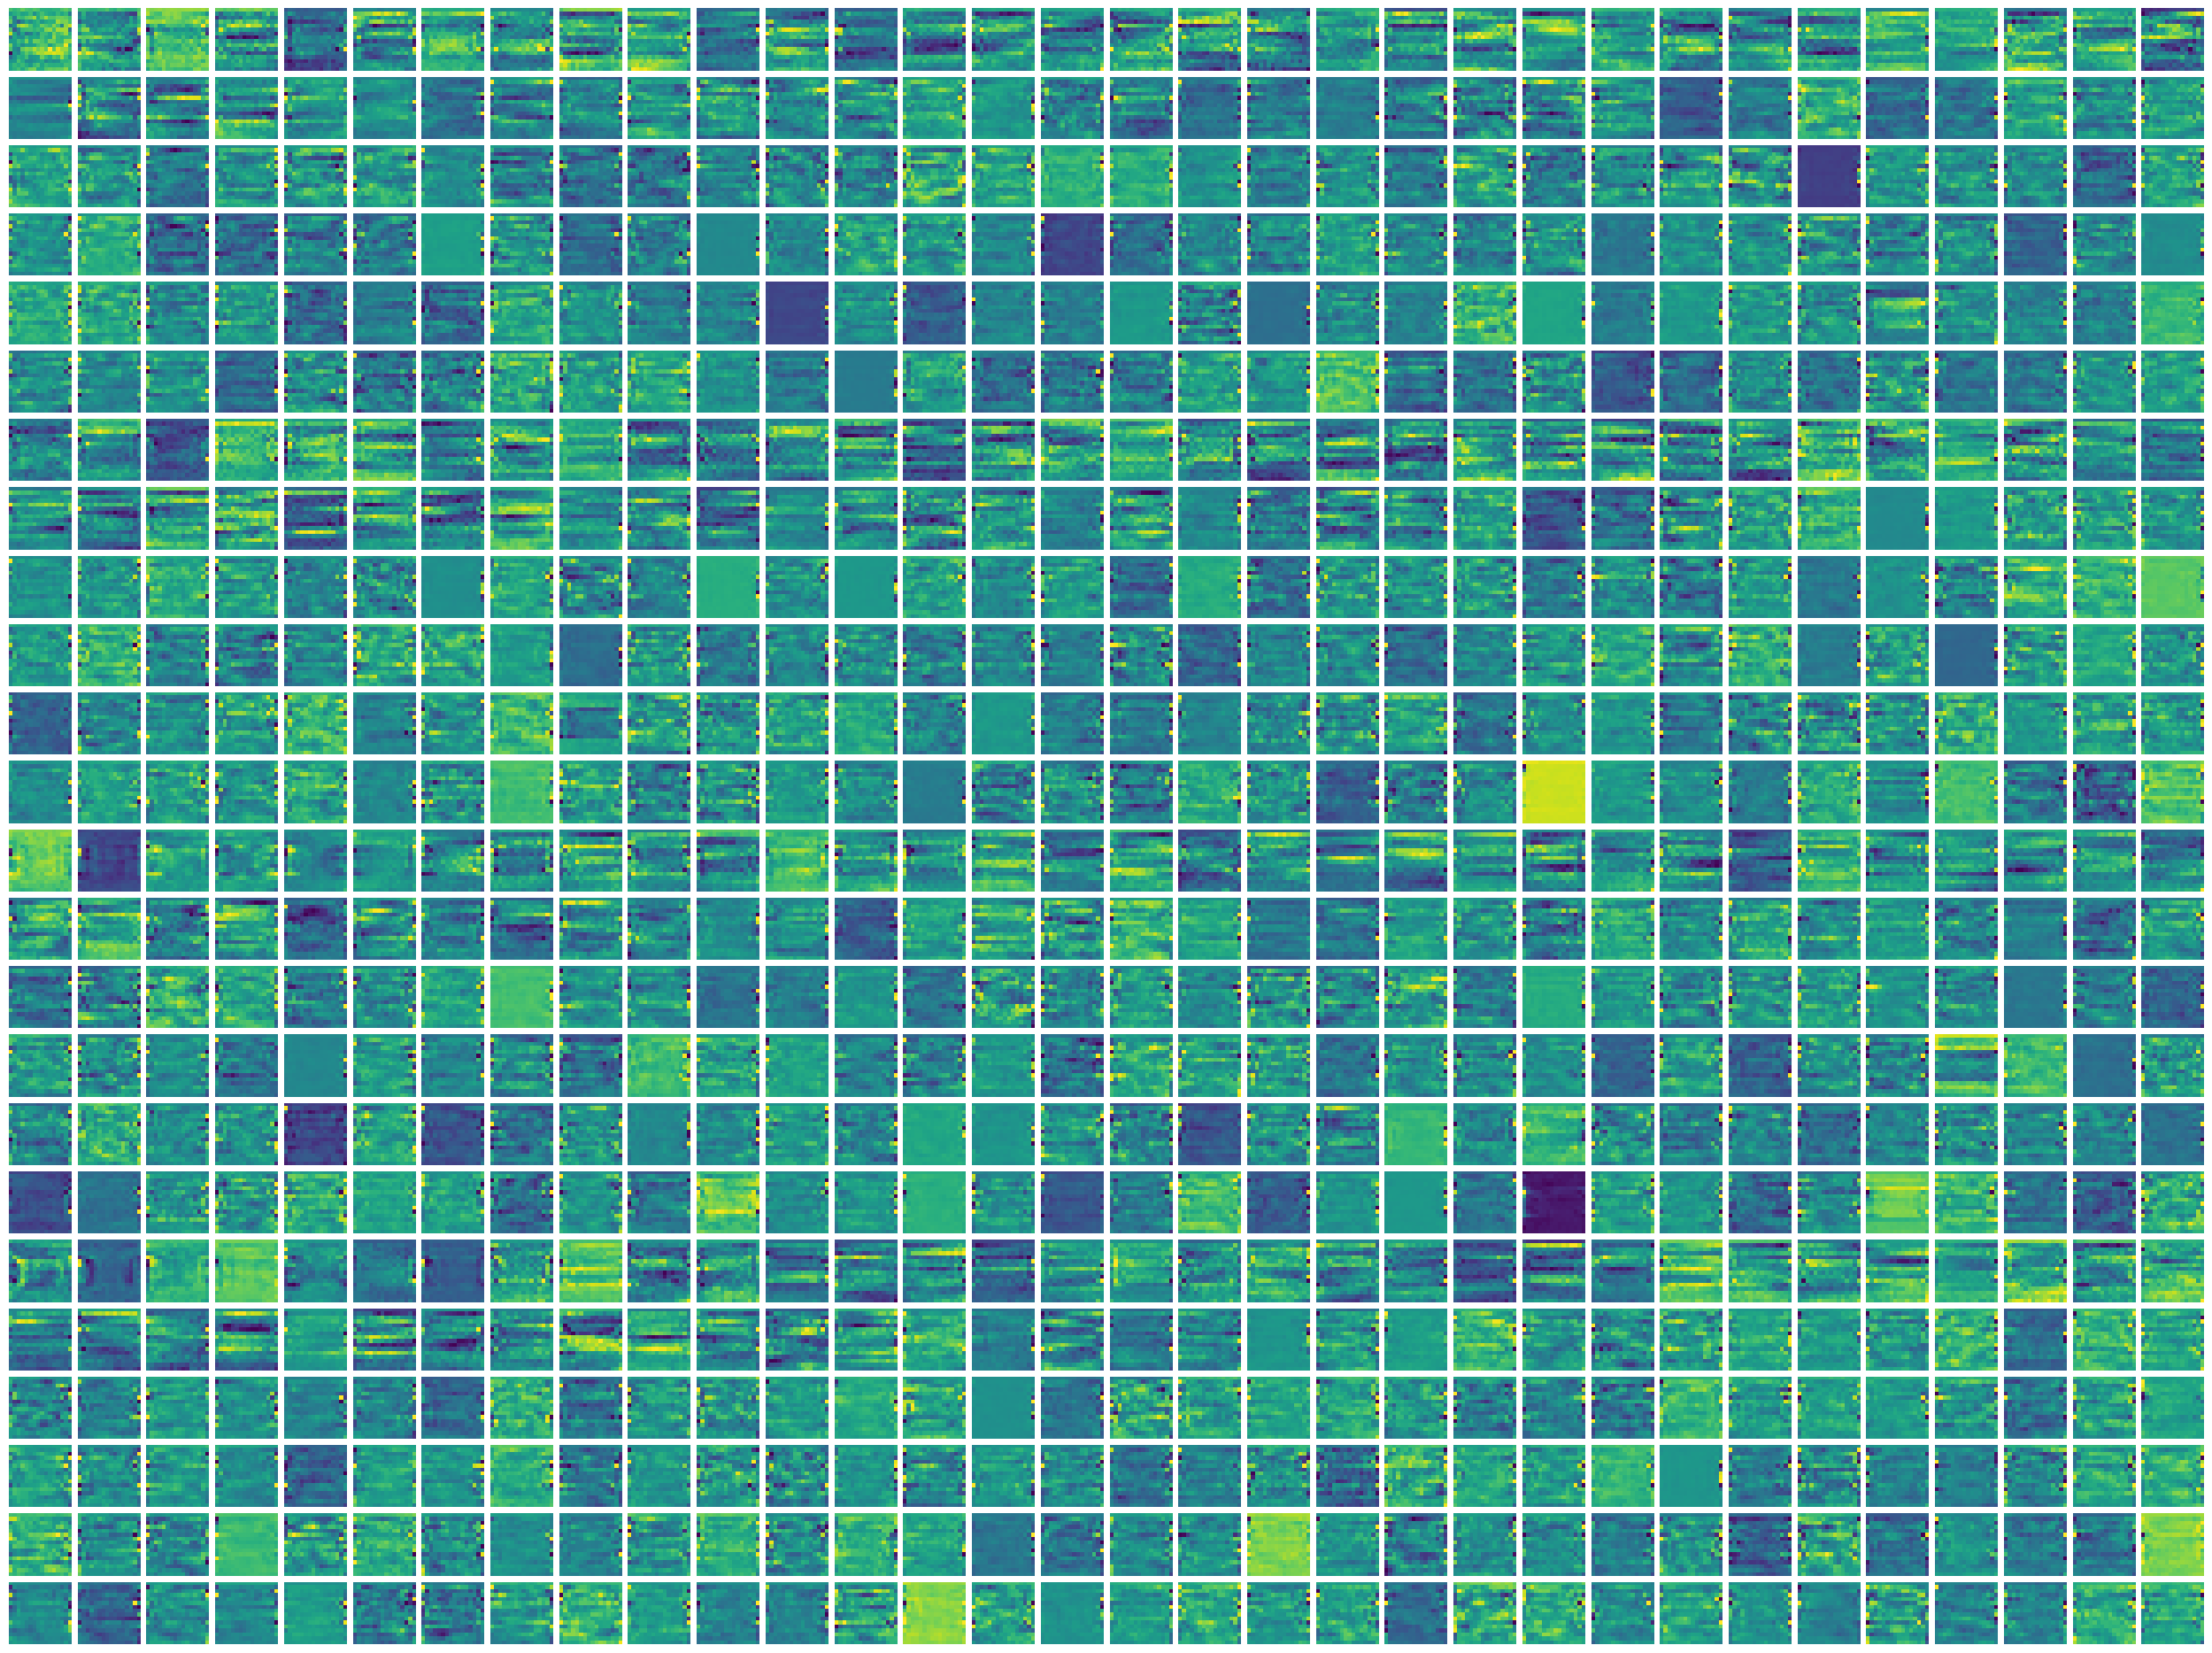

In [5]:
model1M = PIXELForPreTraining.from_pretrained("Team-PIXEL/pixel-base", config=config)
tensor1M = model1M.vit.embeddings.patch_embeddings.projection.weight.data  # grab the Conv2D projection weights
plot_weights(tensor1M, average=True)